# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [7]:
# import necessary libraries
import pandas as pd
import matplotlib as plt
import os

In [8]:
# import dataset
df_cars = pd.read_csv(os.path.join('..', 'data', 'input', 'cars.csv'))

In [9]:
print(df_cars.sample(3))

       manufacturer                      model  year  mileage  \
14042          Audi  A4 45 S line Premium Plus  2022   1209.0   
252738         Ford                  Fusion SE  2020  17956.0   
231610         Ford                Maverick XL  2022    200.0   

                            engine                       transmission  \
14042   2.0L I4 16V GDI DOHC Turbo  7-Speed Automatic with Auto-Shift   
252738  1.5L I4 16V GDI DOHC Turbo                  6-Speed Automatic   
231610  2.0L I4 16V GDI DOHC Turbo                  8-Speed Automatic   

               drivetrain fuel_type    mpg     exterior_color interior_color  \
14042     All-wheel Drive  Gasoline  24-31         Ibis White          Black   
252738  Front-wheel Drive  Gasoline  23-34  Magnetic Metallic    Light Putty   
231610  Front-wheel Drive  Gasoline    NaN       Oxford White     Black Onyx   

        accidents_or_damage  one_owner  personal_use_only  \
14042                   0.0        0.0                0.0   
252

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

Antwoord:

**year**: numeriek (meer specifiek: integer)

**fuel_type**: categorisch (meer specifiek: niet-ordinaal, er is geen rangorde tussen deze categorieën)

**seller_rating**: kan zowel numeriek (meer specifiek: float, incl. potentiële NaN's) als categorisch (meer specifiek: ordinaal) geinterpreteerd worden, dit hangt af van de businessvraag.

In [10]:
# return types
print(df_cars.loc[:,['year', 'fuel_type', 'seller_rating']].dtypes)

# return sample data
print(df_cars.loc[:,['year', 'fuel_type', 'seller_rating']].sample(3))

year               int64
fuel_type         object
seller_rating    float64
dtype: object
        year fuel_type  seller_rating
313967  2022  Gasoline            2.7
132841  2020  Gasoline            2.7
188890  2016  Gasoline            3.6


### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

Antwoord: Zonder gedetailleerd naar de prijzen te kijken is de mediaan de veiligste centrummaat. Bij Vraag 3 kijken we ook naar andere centrummaten.

In [55]:
# calculate median price
median_price_volvo = (df_cars[df_cars['manufacturer'] == 'Volvo']
                   ['price'].median()
                  )
print(f"Mediaanprijs van een 2de hands Volvo: {round(median_price_volvo)}")

Mediaanprijs van een 2de hands Volvo: 36673


In [56]:
# get Volvo's with median price
volvo_median_price = df_cars[(df_cars['price'] == median_price_volvo)
                         & (df_cars['manufacturer'] == 'Volvo')]

volvo_median_price.T

,755471
manufacturer,Volvo
model,XC40 R-Design
year,2020
mileage,35989.0
engine,I-4 cyl
transmission,Automatic with Geartronic
drivetrain,AWD
fuel_type,Gasoline
mpg,NaN
exterior_color,Onyx Black Metallic


### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cumulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

In [67]:
# Berekening gemiddelde prijs van een 2de hands Volvo
avg_price_volvo = (df_cars[df_cars['manufacturer'] == 'Volvo']
                   ['price'].mean()
                  )

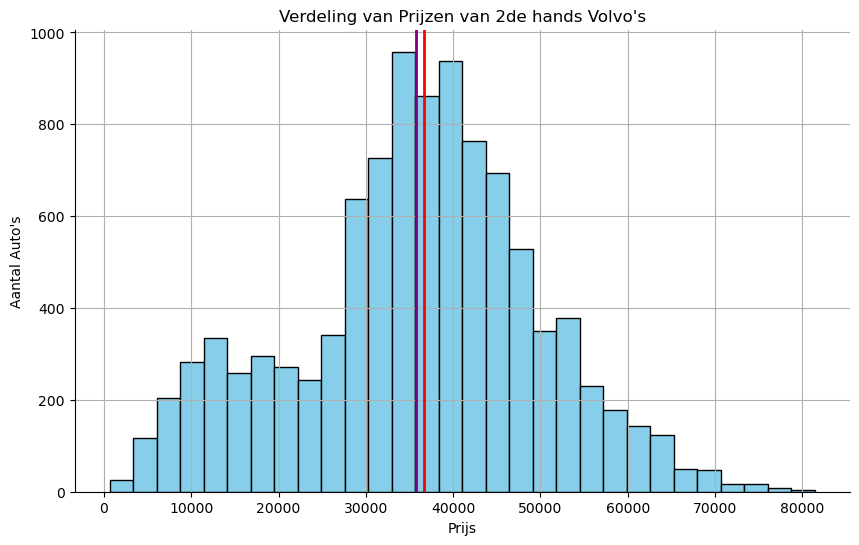

In [70]:
# Histogram van prijzen
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_cars[df_cars['manufacturer'] == 'Volvo']['price'], bins=30, color='skyblue', edgecolor='black')
ax.set_title("Verdeling van Prijzen van 2de hands Volvo's")
ax.set_xlabel('Prijs')
ax.set_ylabel("Aantal Auto's")

# Voeg verticale lijnen toe voor mediaan (rood) en gemiddelde (paars)
ax.axvline(median_price_volvo, color='red', linestyle='solid', linewidth=2, label='Mediaan')
ax.axvline(avg_price_volvo, color='purple', linestyle='solid', linewidth=2, label='Gemiddelde')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show grid
ax.grid(True)
plt.show()

Uit de grafiek leiden we af dat de prijsverdeling min of meer symmetrisch is, weliswaar met een iets zwaardere linkerkant. De linkerkant zal maken dat het gemiddelde lager zal zijn dan de mediaan, en dit wordt ook door de berekeningen bevestigd.

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?

Antwoord: Er zijn veel meer 2de hands Volvo's met Gasoline dan met andere brandstoffen. Een vergelijking obv histogrammen (met absolute aantallen) is moeilijk te maken. Laat ons eerst eens kijken van welke brandstoftypes we voldoende data hebben om een inschatting te maken van het aandeel wagens per prijscategorie.

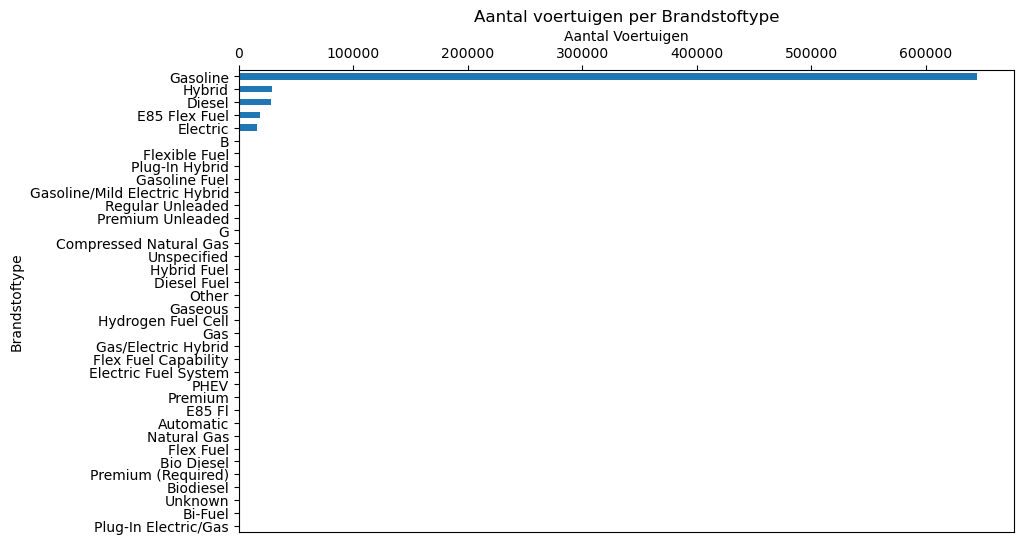

In [68]:
# Aantal voertuigen per fuel_type, gesorteerd van hoog naar laag
fuel_type_counts = df_cars['fuel_type'].value_counts(ascending=True)

# Maak een horizontale barchart voor fuel_type
plt.figure(figsize=(10, 6))  # Stel de grootte van de figuur in
fuel_type_counts.plot(kind='barh')  # Gebruik 'barh' voor horizontale barchart
plt.title('Aantal voertuigen per Brandstoftype')  # Titel van de plot
plt.xlabel('Aantal Voertuigen')  # Label voor de x-as
plt.ylabel('Brandstoftype')  # Label voor de y-as

# Verplaats de x-as naar de bovenkant van de grafiek
ax = plt.gca()  # Get current axis
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')  # Verplaats het label van de x-as naar de bovenkant

plt.show()

### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?